### Notebook to make the figure visualising a cNN fit 

In [17]:
using JLD2
using DataFrames
using CSV
using ComponentArrays
using Lux
using CairoMakie



In [13]:
result_02 = load("../../Data/results_robustness_100runs_2conditionals_noise_0.2.jld2")

conditionals_test = result_02["conditionals_test"]
class_vector = result_02["class_vector"];

In [11]:
conditionals_test_model1_c1 = conditionals_test[1:2:end,1]
conditionals_test_model1_c2 = conditionals_test[2:2:end,1]

20-element Vector{Float64}:
 -0.47360510429243724
 -2.1058568323159266
 -1.479568920319932
 -0.7252198597199447
 -0.514504777453303
 -1.7219520168744888
 -1.8448257043304395
 -0.7005445018644381
 -0.4874494766978435
 -2.3516063426011664
 -1.5410633672031213
 -0.7600115654324163
 -0.44330030557814953
 -2.2651212434101144
 -1.5715619086185828
 -0.6944428367320735
 -0.44876121247704265
 -2.27500215131039
 -1.421068120636959
 -0.6949893146557512

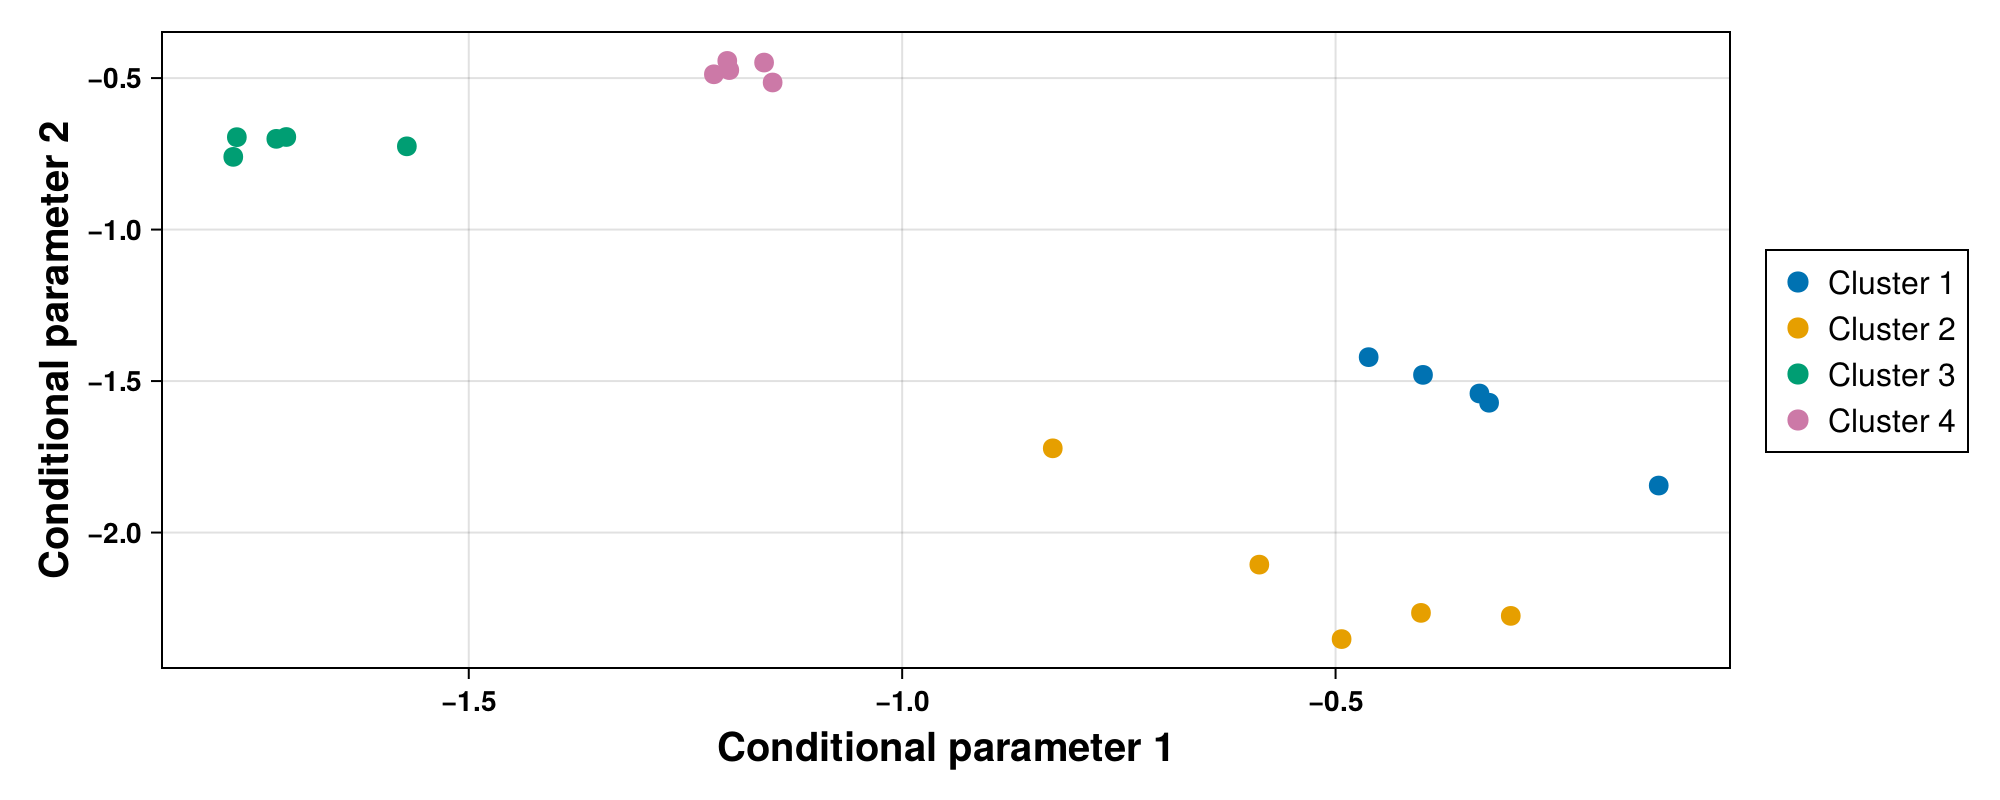

CairoMakie.Screen{IMAGE}


In [26]:
# Use Makie.wong_colors() for colormap
wong_colors = Makie.wong_colors()[1:4]

# Create the figure with the specified size
fig = Figure(size = (1000, 400))  # Adjusted width to accommodate the legend

# First subplot (axis) for the scatter plot
ax = CairoMakie.Axis(fig[1, 1], xlabel = "Conditional parameter 1", ylabel = "Conditional parameter 2",
          xlabelsize = 20, ylabelsize = 20, xticklabelsize = 14, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold, xticklabelfont = :bold, yticklabelfont = :bold)

# Scatter plot of all individuals coloured by cluster assignments
scatter!(ax, conditionals_test_model1_c1, conditionals_test_model1_c2, color=class_vector, colormap=wong_colors, markersize = 14)

# Create the legend dynamically for the dots (clusters) and crosses (cluster centres)
dot_legend = [MarkerElement(color = wong_colors[i], marker = :circle, markersize = 15) for i in 1:4]

# Combine the legend entries and labels
legend_labels = vcat(["Cluster $i" for i in 1:4])

# Add the legend
Legend(fig[1, 2], dot_legend, legend_labels, labelsize = 16)


# Show the plot
display(fig)

# save the plot
save("./cNN_example_fit.png", fig)
